In [24]:
# Import Part
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# Load File
df = pd.read_csv('/Users/xlu/Desktop/DATA1030/Final Project/data/exports/players_2015_2024.csv')

df.head()

,season_end,Player,Age,Tm,GP,W,L,W_PCT,MP,FGM,...,AST%,TOV%,USG%,PER,WS,OWS,DWS,WS/48,BPM,VORP
0,2015,Quincy Acy,24.0,NYK,NaN,NaN,NaN,NaN,1287.0,NaN,...,0.087,0.138,0.155,11.9,1.7,1.0,0.7,0.063,-3.1,-0.3
1,2015,Jordan Adams,20.0,MEM,NaN,NaN,NaN,NaN,248.0,NaN,...,0.101,0.127,0.204,12.8,0.4,0.0,0.4,0.073,-0.6,0.1
2,2015,Steven Adams,21.0,OKC,NaN,NaN,NaN,NaN,1771.0,NaN,...,0.055,0.168,0.143,14.1,4.1,1.9,2.2,0.111,0.4,1.1
3,2015,Jeff Adrien,28.0,MIN,NaN,NaN,NaN,NaN,215.0,NaN,...,0.105,0.129,0.143,14.2,0.4,0.2,0.2,0.087,-2.2,0.0
4,2015,Arron Afflalo,29.0,DEN,NaN,NaN,NaN,NaN,1750.0,NaN,...,0.093,0.103,0.199,11.7,1.8,1.4,0.4,0.050,-1.6,0.2


In [26]:
# Column Missing Value and Percent:
cols_with_na = df.columns[df.isna().any()]
frac_feats   = df.isna().any().mean()

# Number and Percent of Each Column with Missing Value
miss_cnt = df.isna().sum().sort_values(ascending=False)
miss_pct = (df.isna().mean()*100).round(2).sort_values(ascending=False)

print(f"Columns with Missing Values: {list(cols_with_na)}")
print(f"Percentage of Missing Values: {frac_feats:.2%}")
print(pd.DataFrame({'missing': miss_cnt, 'pct(%)': miss_pct}))

Columns with Missing Values: ['GP', 'W', 'L', 'W_PCT', 'FGM', 'FG3M', 'FG3A', 'FTM', 'OREB', 'DREB', 'REB', 'TS%', '3PAr', 'FTr', 'TOV%', 'PER', 'WS', 'OWS', 'DWS', 'WS/48', 'BPM', 'VORP']
Percentage of Missing Values: 56.41%
            missing  pct(%)
TOV%           3861   70.20
VORP           3855   70.09
BPM            3855   70.09
WS/48          3855   70.09
PER            3855   70.09
DWS            3855   70.09
OWS            3855   70.09
WS             3855   70.09
FG3A           1645   29.91
REB            1645   29.91
DREB           1645   29.91
OREB           1645   29.91
FTM            1645   29.91
FG3M           1645   29.91
FGM            1645   29.91
W_PCT          1645   29.91
L              1645   29.91
W              1645   29.91
GP             1645   29.91
3PAr             32    0.58
FTr              32    0.58
TS%               7    0.13
DRB%              0    0.00
USG%              0    0.00
AST%              0    0.00
TRB%              0    0.00
season_end        

In [27]:
# For Specific Cloumns Check
cols = ['W_PCT', 'TS%', '3PAr', 'FTr', 'TOV%', 'FGM', 'FG3M', 'FG3A', 'OREB', 'DREB', 'REB']

# Percentage of Missing Value in Each Specific Column
df[cols].isna().sum()
per_col_missing_frac = df[cols].isna().mean() 
print(per_col_missing_frac)

# Percentage of Missing Value in Total Specific Columns
overall_missing_frac = df[cols].isna().to_numpy().mean()
print(overall_missing_frac)

W_PCT    0.299091
TS%      0.001273
3PAr     0.005818
FTr      0.005818
TOV%     0.702000
FGM      0.299091
FG3M     0.299091
FG3A     0.299091
OREB     0.299091
DREB     0.299091
REB      0.299091
dtype: float64
0.2553223140495868


In [28]:
# Setting Features
# Target Variable y: High USG%
sd = 0.25
df['is_high_usg'] = (df['USG%'] >= sd).astype(int)
df['is_high_usg']

0       0
1       0
2       0
3       0
4       0
       ..
5495    0
5496    0
5497    0
5498    0
5499    1
Name: is_high_usg, Length: 5500, dtype: int64

In [29]:
# Feature Variables & Missing Value ≤3%
prefer_numeric = [
    "Age","MP","GP","MIN","G","GS",
    "PTS","AST","TRB","DRB","ORB","STL","BLK","TOV",
    "FGA","FGM","FG%","3PA","3PM","3P%","FTA","FTM","FT%",
    "TS%","TS_PCT","FTr","FTR","3PAr","THREE_PAR",
    "ORB%","DRB%","TRB%","AST%"
]
prefer_categorical = ["Tm","season_end"]

exists = [c for c in df.columns if c in (prefer_numeric + prefer_categorical)]
candidates = []
for c in exists:
    low = c.lower()
    if ("usg" in low) or (c == "is_high_usg") or (("id" in low) or ("uuid" in low)):
        continue
    candidates.append(c)

# Count Missing Values & Filter
ms = df[candidates].isna().sum()
frac = ms / len(df)
features_le_3pct = sorted([c for c in candidates if frac[c] <= 0.03])

# X / y
X_cols = features_le_3pct
y_col = "is_high_usg"

df[X_cols]
df[y_col]

0       0
1       0
2       0
3       0
4       0
       ..
5495    0
5496    0
5497    0
5498    0
5499    1
Name: is_high_usg, Length: 5500, dtype: int64

In [30]:
# EDA
print(f"Shape: {df.shape[0]} rows x {df.shape[1]} cols")
print("\nDtype counts:")
print(df.dtypes.astype(str).value_counts())
print("\nHead(5):")
print(df.head(5))


Shape: 5500 rows x 40 cols

Dtype counts:
float64    36
int64       2
object      2
Name: count, dtype: int64

Head(5):
   season_end         Player   Age   Tm  GP   W   L  W_PCT      MP  FGM  ...  \
0        2015     Quincy Acy  24.0  NYK NaN NaN NaN    NaN  1287.0  NaN  ...   
1        2015   Jordan Adams  20.0  MEM NaN NaN NaN    NaN   248.0  NaN  ...   
2        2015   Steven Adams  21.0  OKC NaN NaN NaN    NaN  1771.0  NaN  ...   
3        2015    Jeff Adrien  28.0  MIN NaN NaN NaN    NaN   215.0  NaN  ...   
4        2015  Arron Afflalo  29.0  DEN NaN NaN NaN    NaN  1750.0  NaN  ...   

    TOV%   USG%   PER   WS  OWS  DWS  WS/48  BPM  VORP  is_high_usg  
0  0.138  0.155  11.9  1.7  1.0  0.7  0.063 -3.1  -0.3            0  
1  0.127  0.204  12.8  0.4  0.0  0.4  0.073 -0.6   0.1            0  
2  0.168  0.143  14.1  4.1  1.9  2.2  0.111  0.4   1.1            0  
3  0.129  0.143  14.2  0.4  0.2  0.2  0.087 -2.2   0.0            0  
4  0.103  0.199  11.7  1.8  1.4  0.4  0.050 -1.6 

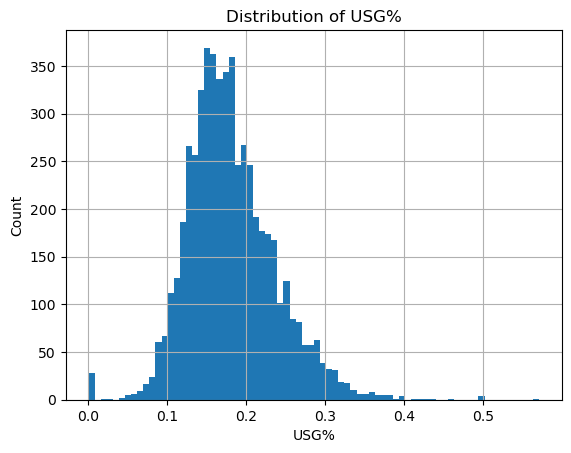

In [31]:
# Plot
# USG Distribution Histgram
plt.figure()
df["USG%"].dropna().hist(bins="auto")
plt.xlabel("USG%"); plt.ylabel("Count"); plt.title(f"Distribution of {"USG%"}")
plt.show()

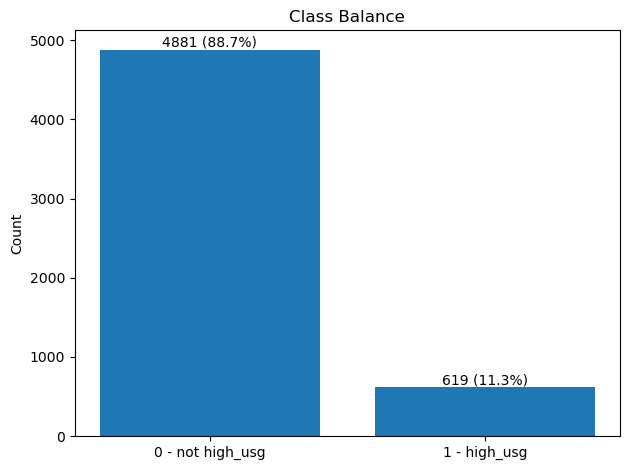

In [32]:
# Transform 'USG%' into Binary Classification 'is_high_usg'
counts = df["is_high_usg"].value_counts()
labels = ["0", "1"]
tot = counts.sum()

plt.figure()
bars = plt.bar(labels,counts)
for b, v in zip(bars, counts):
    plt.text(b.get_x()+b.get_width()/2, v, f"{v} ({v/tot:.1%})", ha="center", va="bottom")
plt.ylabel("Count")
plt.xticks([0,1], ["0 - not high_usg", "1 - high_usg"])
plt.title("Class Balance")
plt.tight_layout()
plt.show()

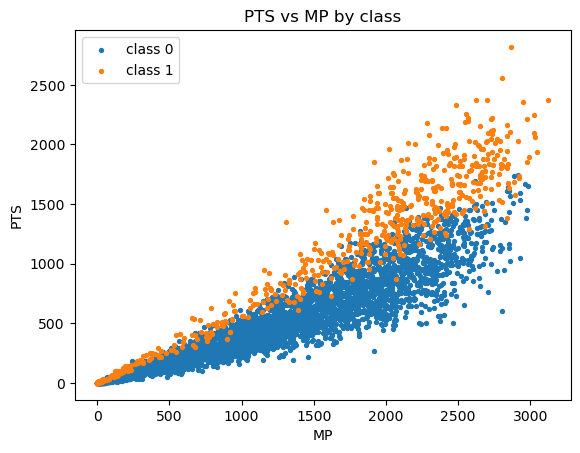

In [33]:
# PTS & MP Dot Plot (by y_col)
plt.figure()
for cl in sorted(df[y_col].unique()):
    m = (df[y_col] == cl)
    plt.scatter(df.loc[m,"MP"], df.loc[m,"PTS"], s=8, label=f"class {int(cl)}")
plt.xlabel("MP"); plt.ylabel("PTS"); plt.title("PTS vs MP by class"); plt.legend()
plt.show()

/var/folders/31/mvxvtths0vz4zkng152j8my00000gn/T/ipykernel_50628/3958463666.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=["0","1"], showfliers=False)


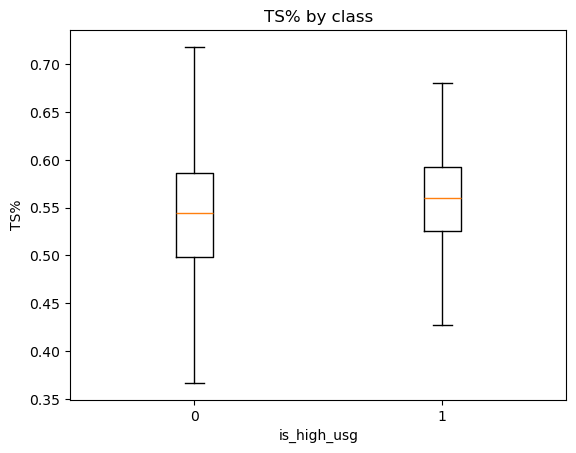

In [34]:
# "TS%" Boxplot
x0 = pd.to_numeric(df.loc[df[y_col]==0, "TS%"], errors="coerce").dropna().values
x1 = pd.to_numeric(df.loc[df[y_col]==1, "TS%"], errors="coerce").dropna().values
if (len(x0) >= 5) and (len(x1) >= 5):
    plt.figure()
    plt.boxplot([x0, x1], labels=["0","1"], showfliers=False)
    plt.xlabel("is_high_usg"); plt.ylabel("TS%"); plt.title(f"{"TS%"} by class")
    plt.show()

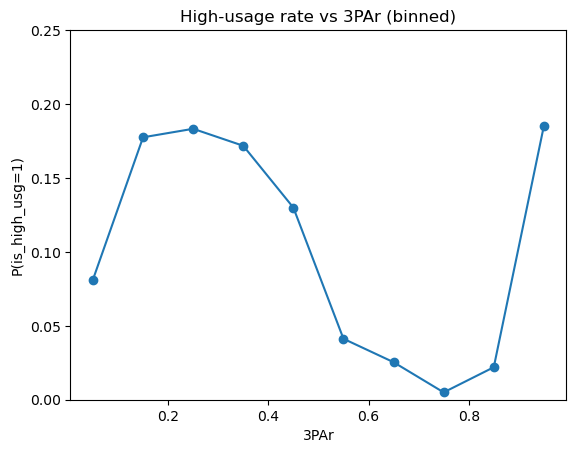

In [35]:
# "3PAr" Line Plot
x = pd.to_numeric(df["3PAr"], errors="coerce")
y = pd.to_numeric(df[y_col], errors="coerce")
m = x.notna() & y.notna()
edges = np.linspace(0.0, 1.0, 11)
idx = np.digitize(x[m].values, edges, right=False) - 1
idx = np.clip(idx, 0, 9)
pos = np.zeros(10); cnt = np.zeros(10)
for i, yi in zip(idx, y[m].values):
    cnt[i] += 1.0
    pos[i] += yi
rate = np.where(cnt>0, pos/cnt, np.nan)
centers = 0.5*(edges[:-1] + edges[1:])
plt.figure()
plt.plot(centers, rate, marker="o")
plt.xlabel("3PAr"); plt.ylabel("P(is_high_usg=1)"); plt.ylim(0,0.25)
plt.title(f"High-usage rate vs {"3PAr"} (binned)")
plt.show()

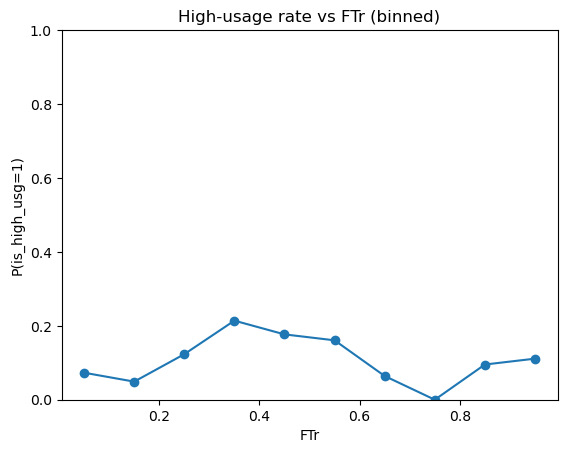

In [36]:
# "FTr" Line Plot
x = pd.to_numeric(df["FTr"], errors="coerce")
y = pd.to_numeric(df[y_col], errors="coerce")
m = x.notna() & y.notna()
edges = np.linspace(0.0, 1.0, 11)
idx = np.digitize(x[m].values, edges, right=False) - 1
idx = np.clip(idx, 0, 9)
pos = np.zeros(10); cnt = np.zeros(10)
for i, yi in zip(idx, y[m].values):
    cnt[i] += 1.0
    pos[i] += yi
rate = np.where(cnt>0, pos/cnt, np.nan)
centers = 0.5*(edges[:-1] + edges[1:])
plt.figure()
plt.plot(centers, rate, marker="o")
plt.xlabel("FTr"); plt.ylabel("P(is_high_usg=1)"); plt.ylim(0,1)
plt.title(f"High-usage rate vs {f"FTr"} (binned)")
plt.show()

/var/folders/31/mvxvtths0vz4zkng152j8my00000gn/T/ipykernel_50628/1233013023.py:24: RuntimeWarning: invalid value encountered in divide
  rate = np.where(cnt > 0, pos / cnt, np.nan)


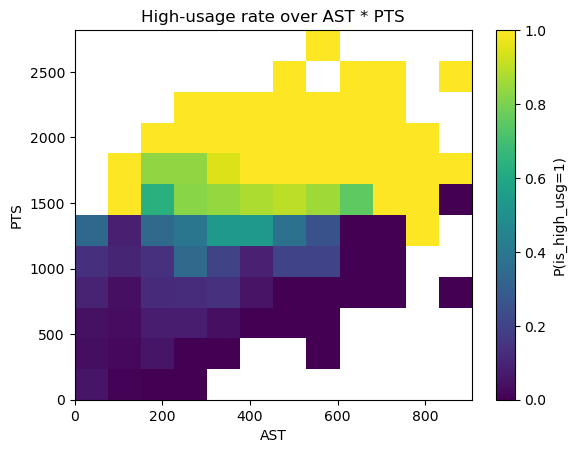

In [ ]:
# 2D Heatmap
X_VAR = "AST"    # "MP"、"TS%"、"3P%"、"TRB%"、"PTS" ...
Z_VAR = "PTS"    # "PTS"、"FTr"/"FTR"、"3PAr" ...

x = df[X_VAR]
z = df[Z_VAR]

nbins = 12

ex = np.linspace(np.nanmin(x), np.nanmax(x), nbins+1)
ez = np.linspace(np.nanmin(z), np.nanmax(z), nbins+1)

xi = np.digitize(x, ex, right=False) - 1
zi = np.digitize(z, ez, right=False) - 1
xi = np.clip(xi, 0, nbins-1)
zi = np.clip(zi, 0, nbins-1)

pos = np.zeros((nbins, nbins), dtype=float)
cnt = np.zeros((nbins, nbins), dtype=float)
for i, j, yi in zip(xi, zi, y):
    cnt[j, i] += 1.0
    pos[j, i] += yi

rate = np.where(cnt > 0, pos / cnt, np.nan)
np.divide(pos, cnt, out=rate, where=cnt > 0)

# Plot
plt.figure()
plt.imshow(rate, origin="lower", extent=[ex[0], ex[-1], ez[0], ez[-1]], aspect="auto")
plt.colorbar(label="P(is_high_usg=1)")
plt.xlabel(X_VAR)
plt.ylabel(Z_VAR)
plt.title(f"High-usage rate over {X_VAR} * {Z_VAR}")
plt.show()